In [24]:
# Import all necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [25]:
# Generate sample data.
N = 1000
np.random.seed(42)

x = np.sort(5 * np.random.rand(N, 1), axis=0)
y = np.sin(x).ravel()
y_orig = np.sin(x).ravel()

# Add noise to targets.
y += 0.1*np.random.randn(N)

# Split data into train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [26]:
# Set parameters for grid-search.
param_grid = [{'weights': ['uniform', 'distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]}]

svc = KNeighborsRegressor()

clf = GridSearchCV(svc, param_grid, cv=5, verbose=10, n_jobs=-1)
clf.fit(x_train, y_train)
print(clf.best_params_)
print(clf.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ...... n_neighbors=1, weights=uniform, score=0.964, total=   0.0s
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ...... n_neighbors=1, weights=uniform, score=0.964, total=   0.0s
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ...... n_neighbors=1, weights=uniform, score=0.966, total=   0.0s
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ...... n_neighbors=1, weights=uniform, score=0.955, total=   0.0s
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ...... n_neighbors=1, weights=uniform, score=0.965, total=   0.0s
[CV] n_neighbors=1, weights=distance .................................
[CV] ..... n_neighbors=1, weights=distance, score=0.964, total=   0.0s
[CV] n_neighbors=1, weights=distance .................................
[CV] ..... n_ne

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s


[CV] ...... n_neighbors=7, weights=uniform, score=0.975, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ...... n_neighbors=7, weights=uniform, score=0.977, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] ..... n_neighbors=7, weights=distance, score=0.978, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] ..... n_neighbors=7, weights=distance, score=0.974, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] ..... n_neighbors=7, weights=distance, score=0.974, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] ..... n_neighbors=7, weights=distance, score=0.969, total=   0.0s
[CV] n_neighbors=7, weights=distance .................................
[CV] ..... n_neighbors=7, weights=distance, score=0.975, total=   0.0s
[CV] n_neighbors=8, weights=uniform ..................................
[CV] .

[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.4s finished


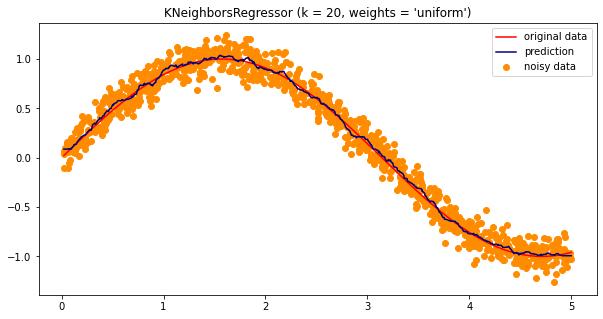

In [27]:
# Fit regression model
n_neighbors = 20

plt.figure(figsize=(10,5))
   
knn = KNeighborsRegressor(n_neighbors, weights='uniform')
y_ = knn.fit(x_train, y_train).predict(x)

plt.scatter(x, y, color='darkorange', label='noisy data')
plt.plot(x, y_orig, color='red', label='original data')
plt.plot(x, y_, color='navy', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, 'uniform'))

# Save figure
plt.savefig("knn_regression.png", dpi=600)
#Show the plot.
plt.show()

In [28]:
error_train = np.sqrt(mean_squared_error(y_train, knn.predict(x_train)))
error_test = np.sqrt(mean_squared_error(y_test, knn.predict(x_test)))

print("MSE T = " + str(error_train))
print("MSE V = " + str(error_test))

MSE T = 0.09598216330992831
MSE V = 0.10331973237783179
